# Исследование успешности компьютерных игр

## Содержание

1. Описание исследования

    1.1. Описание данных
    
    1.2. Цель исследования
    
    1.3. Ход исследования
    
    
2. Предобработка данных

    2.1. Замена названий столбцов
    
    2.2. Обработка дубликатов

    2.3. Обработка пропусков
    
    2.4. Преобразование типов данных

    2.5. Расчет суммарных продаж

3. Исследовательский анализ

   3.1. Изучение временных периодов в данных
   
   3.2. Изучение крупнейших платформ по продажам
   
   3.3. Выделение актуального периода
   
   3.4. Определение потенциально прибыльных платформ
   
   3.5. Изучение глобальных продаж по платформам
   
   3.6. Изучение влияния отзывов критиков и пользователей на продажи платформы

   3.7. Изучение продаж по жанрам
   
   3.8. Составление портретов пользователей из разных регионов

4. Проверка гипотез

    4.1. Гипотеза о равенстве рейтингов платформ
    
    4.2. Гипотеза о неравенстве рейтингов жанров

5. Выводы

6. Рекомендации заказчику

## 1. Описание исследования

Доступны данные о продажах игр интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры, из открытых источников получены данные: оценки пользователей и экспертов, жанры и платформы. Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Планируется разработка кампанию на 2017-й по данным на декабрь 2016ого года, т.е. данные за этот год могут быть не полными. В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».Необходимо выявить определяющие успешность игры закономерности для развития успешных продуктов, планирования рекламных кампаний.


### 1.1. Описание данных


Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


### 1.2. Цель исследования

Цель исследования заключается в анализе информации об успешных компьютерных играх и проверке гипотез, которые помогут изучить факторы, влияющие на их успешность.

### 1.3. Ход исследования


Шаг 1. Изучение общей информации

Шаг 2. Предобработка данных

Шаг 3. Исследовательский анализ

Шаг 4. Портрет пользователя каждого региона

Шаг 5. Проверка гипотез

Шаг 6. Общий вывод

Шаг 7. Рекомендации заказчику

## 2. Предобработка данных

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st

In [2]:
# чтение данных 
df = pd.read_csv('/datasets/games.csv')

In [3]:
# просмотр первых строк
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
# вывод общей информации
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# описание числовых данных
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
# описание категориальных данных
df.describe(include='object')

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


Краткий вывод:

*В наборе данных следует привести названия столбцов к нижнему регистру. Необходимо преобразовать данные из столбцов: 'year_of_release' к целочисленному типу данных int64, 'user_score' к типу данных float64. В столбце 'user_score' вместо рейтинга, который можно выразить числом с плавающей точкой присутствует значение 'tbd', что значит 'to be determined' - ещё не определёно, необходимо корректно обработать это значение. Также необходимо обработать пропущенные значения и проверить наличие строк дубликатов.*

### 2.1. Замена названий столбцов

In [7]:
# перевод регистра в названии столбцов к нижнему
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### 2.2. Обработка дубликатов

In [8]:
# проверка наличия полных дубликатов в данных
df.duplicated().sum()

0

In [9]:
# проверка наличия полных дубликатов в данных
df.duplicated(subset=['name', 'platform', 'year_of_release']).sum()

2

In [10]:
# удаление дубликатов
df = df.drop_duplicates(subset=['name', 'platform', 'year_of_release'])

### 2.3. Обработка пропусков

In [11]:
# проверка пропусков в данных
na = pd.DataFrame()
na['sum'] = df.isna().sum().sort_values(ascending=False)
na['part'] = df.isna().mean().sort_values(ascending=False)*100
display(na)

,sum,part
critic_score,8577,51.319332
rating,6765,40.477473
user_score,6700,40.088554
year_of_release,269,1.609526
name,1,0.005983
genre,1,0.005983
platform,0,0.000000
na_sales,0,0.000000
eu_sales,0,0.000000
jp_sales,0,0.000000


In [12]:
# изучение пропусков оценки критиков
df[df['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [13]:
# проверка данных c пропусками в оценке критиков перед удалением
(df[df['critic_score'].isna()]['na_sales'] + 
df[df['critic_score'].isna()]['eu_sales'] + 
df[df['critic_score'].isna()]['jp_sales'] + 
df[df['critic_score'].isna()]['other_sales']).sum()

3311.29

*Пропусков в столбце 'user_score' почти половина от всех данных, причем среди пропусков можно заметить очень популярные игры, они имеют большие продажи. Такие данные нельзя отбрасывать.*

In [14]:
# изучение пропусков оценки пользователей
df[df['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [15]:
# определение уникальных значений 'user_score'
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [16]:
# подсчёт количества строк со значением 'tbd' в столбце 'user_score'
df[df['user_score'] == 'tbd']['user_score'].count()

2424

*Пропусков в столбце 'user_score' также большое количество, и эти данные занимают большую долю от продаж. Эти пропуски нельзя отбрасывать. Также присутствует значение tbd, количество игр с таким рейтингом достаточно большое. Принято решение изменить 'tbd' на nan для удобства расчётов.*

In [17]:
# изучение пропусков рейтинга
df[df['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [18]:
# определение уникальных значений рейтинга
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Возможные причины пропусков в данных:


**critic_score - 8578** - либо игра не была оценена критиками (низкая популярность), либо данные потеряны в результате технической ошибки. Данных достаточно много, причем они занимают большую долю от продаж. Нельзя отбросить эти пропуски. 


**rating - 6766** - игра не получила рейтинг, ввиду низкой популярности, либо данные потеряны в результате технической ошибки. Заполним пропуски значением 'RP', что означает rating pending, рейтинг рассматривается.


**user_score - 6701** - либо пользователи не оценили игру ввиду низкой популярности, либо данные потеряны в результате технической ошибки. Значение 'tbd' по смыслу является пропуском, принято решение изменить эти значения на nan.

**year_of_release - 269** - год выпуска можно найти практически у любой компьютерной игры, скорее всего данные потеряны в результате технической ошибки. Эти строки можно отбросить, так как их не очень много

**name - 2** - игра без названия - это невозможно, скорее всего произошла техническая ошибка при наполнении этого набора данных.  Эти строки можно отбросить, так как их не много.

**genre - 2** - практически любую игру можно отнести к какому-то определенному жанру, пропуски скорее всего вызваны технической ошибкой при наполнении набора данных. Эти строки можно отбросить, так как их не много.

In [19]:
# проверка данных c пропусками в году релиза перед удалением
(df[df['year_of_release'].isna()]['na_sales'] + 
df[df['year_of_release'].isna()]['eu_sales'] + 
df[df['year_of_release'].isna()]['jp_sales'] + 
df[df['year_of_release'].isna()]['other_sales']).sum()

98.91999999999999

In [20]:
# проверка данных с пропусками в названии перед удалением
display(df[df['name'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN


In [21]:
# проверка данных с пропусками в жанре перед удалением
display(df[df['genre'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN


*Пропусков в столбцах 'year_of_release', 'name', 'genre' небольшое количество, причем продажи этих игр были небольщими, можно отбросить эти пропуски.*

In [22]:
# замена 'tbd' на nan
df['user_score'] = df['user_score'].replace('tbd', np.NaN)

df['rating'] = df['rating'].fillna('RP')

# удаление пропусков
df = df.dropna(subset=['year_of_release', 'name', 'genre'])

# проверка результата действий
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

In [23]:
# Добавление столбца с альтернативным значением рейтинга ESRB для вычислений
# https://en.wikipedia.org/wiki/Entertainment_Software_Rating_Board
rating_change = {'RP' : 0,
                 'E' : 1,
                 'EC' : 1,
                 'K-A' : 1,
                 'E10+' : 2,
                 'T' : 3,
                 'M' : 4,
                 'AO' : 5,
                }

df['rating_num'] = df['rating']

# функция для замены буквенного рейтинга числом
def change_func(rating):
    for key in rating_change:
        if rating == key:
            return rating_change[key]

# применим функцию
df['rating_num'] = df['rating_num'].apply(change_func)

# проверим изменения в данных
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_num
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,1
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,0
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,1
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,1
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,0


### 2.4. Преобразование типов данных

In [24]:
# изменение типов данных столбцов
df['critic_score'] = df['critic_score'].astype('float64')
df['user_score'] = df['user_score'].astype('float64')
df['rating_num'] = df['rating_num'].astype('int64')
df['year_of_release'] = df['year_of_release'].astype('int64')

### 2.5. Расчет суммарных продаж

In [25]:
# добавление столбца с суммарными продажами по всем регионам
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_num,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,1,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,0,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,1,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,1,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,0,31.38


**Результаты предобработки данных:**

*Отредактированы названия столбцов. Обнаружены и обработаны 2 строки неполных дубликатов. Принято решение оставить пропуски в 'critic_score' так как данных слишком много, и они имеют большую общую сумму продаж, в столбце 'user_score' значение 'tbd' заменили на nan так как оно по смыслу является неопределенным значением, в столбце 'rating' заполнили пропуски установкой значения 'RP', после чего добавлен столбец с числовым значением рейтинга, для произведения вычислений в дальнешем. Пропуски 'year_of_release', 'name', 'genre' удалены, так как таких данных было незначительное количество. Добавлен столбец с расчетным значением суммы продаж по регионам.*

In [26]:
# check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  rating_num       16443 non-null  int64  
 12  total_sales      16443 non-null  float64
dtypes: float64(7), int64(2), object(4)
memory usage: 1.8+ MB


## 3. Исследовательский анализ

### 3.1. Изучение временных периодов в данных

In [27]:
# определим, сколько игр выпускалось за разные годы, выведем 5 наиболее насыщенных по релизам годов
years_count = df.pivot_table(index='year_of_release', values='name', aggfunc='count')
years_count.columns = ['count']
display(years_count.sort_values(by='count', ascending=False).head(5))

,count
year_of_release,
2008,1427
2009,1426
2010,1255
2007,1197
2011,1136


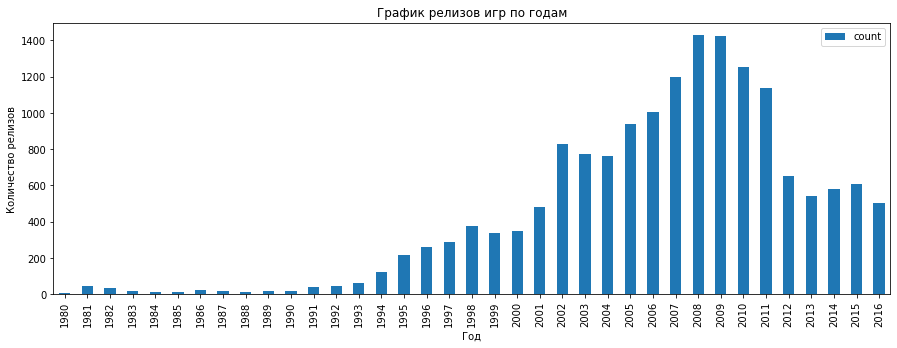

In [28]:
# построим гистограмму для оценки количества игр по годам
ax = years_count.plot(kind='bar', figsize=(15, 5))
ax.set_title('График релизов игр по годам')
ax.set_xlabel('Год')
ax.set_ylabel('Количество релизов')
plt.show()

*Следует обратить внимание, что до 2001 года выпускалось небольшое количество игр каждый год, не более 400. Только к концу периода этот показатель был достигнут в результате резкого скачка. Для понимания общей картины продаж и оценки коммерческой успешности проектов следует рассмотреть период с 2002 по 2016 годы. Таких резких скачков как в 2002 году уже не было, 5 наиболее результативных по количеству релизов года входят в этот промежуток, и также видна динамика развития индустрии в целом.*

### 3.2. Изучение крупнейших платформ по продажам

In [29]:
# определим наиболее крупные платформы по продажам за всё время
platform_total_sales = df.pivot_table(
    index='platform', 
    values='total_sales', 
    aggfunc='sum').sort_values(
    by='total_sales', 
    ascending=False).head(10)
display(platform_total_sales)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


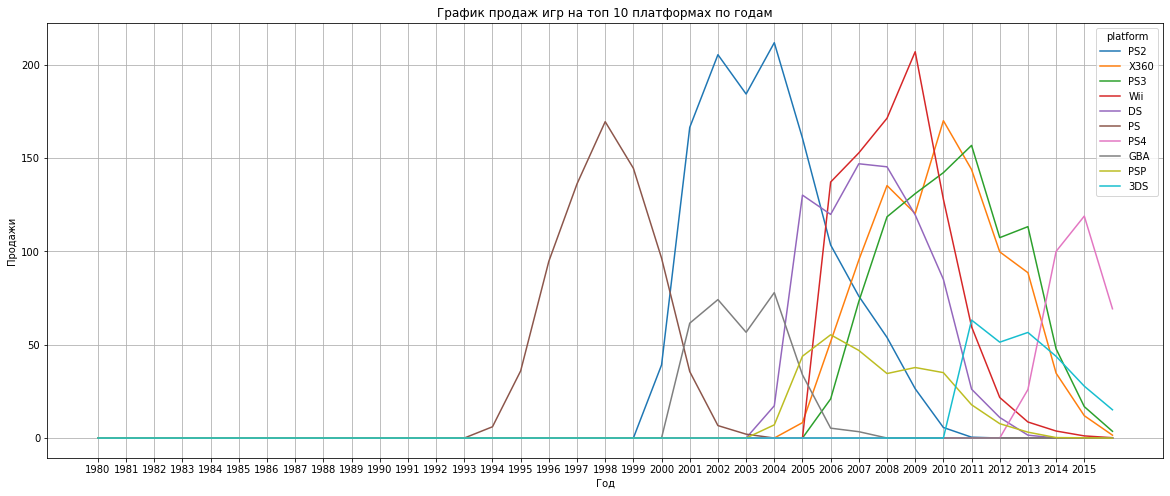

In [30]:
# сгруппируем данные для платформ для оценки распределения продаж по годам
platform_sales = df.pivot_table(index='year_of_release', 
                                columns='platform', 
                                values='total_sales', 
                                aggfunc='sum')

# заполним получившиеся пропуски для годов, когда игр на платформе не выходило, нулями
platform_sales = platform_sales.fillna(0)

# отберём 10 платформ с наибольшими продажами
top_platform_sales = platform_sales.loc[:, platform_total_sales.index]

# выведем последовательно графики с динамикой продаж по годам для самых крупных платформ
top_platform_sales.plot(kind='line',
                        xticks=list(range(1980, 2016)),
                        grid=True, 
                        title='График продаж игр на топ 10 платформах по годам',
                        xlabel='Год',
                        ylabel='Продажи',
                        figsize=(20,8))
    
plt.show()

In [31]:
top_platform_sales['DS']

year_of_release
1980      0.00
1981      0.00
1982      0.00
1983      0.00
1984      0.00
1985      0.02
1986      0.00
1987      0.00
1988      0.00
1989      0.00
1990      0.00
1991      0.00
1992      0.00
1993      0.00
1994      0.00
1995      0.00
1996      0.00
1997      0.00
1998      0.00
1999      0.00
2000      0.00
2001      0.00
2002      0.00
2003      0.00
2004     17.27
2005    130.14
2006    119.81
2007    146.94
2008    145.31
2009    119.54
2010     85.02
2011     26.18
2012     11.01
2013      1.54
2014      0.00
2015      0.00
2016      0.00
Name: DS, dtype: float64

In [32]:
# удалим аномалию продаж у платформы DS в 1985 году, так как платформа была выпущена в 2004 году
df = df.drop(index=df[(df['platform'] == 'DS') & (df['year_of_release'] == 1985)].index)

*Наибольшие суммарные продажи имеют платформы: 'PS2', 'X360', 'Wii', 'PS3', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'GB'. В среднем примерно за 8 лет появляются новые и исчезают старые платформы. В качестве актуального периода для предсказания результатов продаж 2017 года можно рассмотреть временной отрезок, состоящий из половины цикла развития поколения игровых платформ, т.е. 4 последних года с 2013 по 2016 год. Часть из платформ текущего поколения будет падать по продажам, часть будет на пике, а часть только расти. Таким образом, мы избавимся от платформ, продажи которых уже давно упали.*

### 3.3. Выделение актуального периода

In [33]:
# выделим данные за актуальный период 2013-2016 год
actual = df[df['year_of_release'] >= 2013]
actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_num,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,4,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,4,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,RP,0,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,RP,0,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,4,12.62


In [34]:
# изучим общую информацию о новом наборе данных
actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           2233 non-null   object 
 11  rating_num       2233 non-null   int64  
 12  total_sales      2233 non-null   float64
dtypes: float64(7), int64(2), object(4)
memory usage: 244.2+ KB


### 3.4. Определение потенциально прибыльных платформ

In [35]:
# определим платформы, лидирующие по продажам
actual_platform_total_sales = actual.pivot_table(
    index='platform', 
    values='total_sales', 
    aggfunc='sum').sort_values(
    by='total_sales', 
    ascending=False).head(10)
display(actual_platform_total_sales)

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


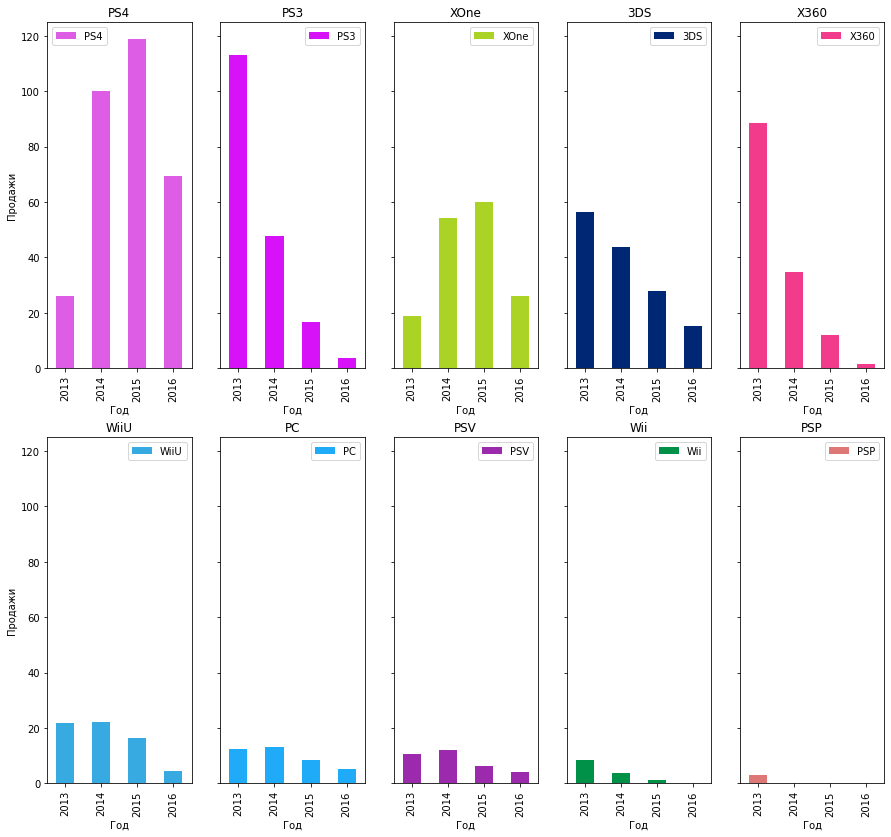

In [36]:
# оценим продажи разных платформ по годам за актуальный период
# сгруппируем данные для платформ для оценки распределения продаж по годам
actual_platform_sales = actual.pivot_table(
    index='platform', 
    columns='year_of_release', 
    values='total_sales', 
    aggfunc='sum')

# заполним получившиеся пропуски для годов, когда игр на платформе не выходило, нулями
actual_platform_sales = actual_platform_sales.fillna(0)

# отберём 10 платформ с наибольшими продажами
top_actual_platform_sales = actual_platform_sales.loc[actual_platform_total_sales.index, :]

# выведем последовательно графики с динамикой продаж по годам для самых крупных платформ
fig, ax = plt.subplots(ncols=5, nrows=2, sharey=True, figsize=(15, 14))

for i, row in enumerate(ax):
    for j, col in enumerate(row):
        platform = actual_platform_total_sales.index[i * 5 + j]
        top_actual_platform_sales.loc[platform,:].plot(ax=col, kind='bar', color=np.random.rand(3,))
        col.set_title(platform)
        col.set_xlabel('Год')
        col.set_ylabel('Продажи')
        col.set_label(platform)
        col.legend()
    
plt.show()

*Лидерами по продажам за актуальный период являются платформы PS4, PS3, XOne, 3DS, X360. Суммарные продажи остальных платформ более чем в 2 раза меньше, а также имеют отрицательную динамику. PS3, X360, 3DS прошли свой пик по продажам, у этих платформ видна тенденция к сокращению продаж. PS4 и XOne актуальные платформы, их вклад в сумму продаж за 2017 год будет наибольшим из существующих платформ.*

### 3.5. Изучение глобальных продаж по платформам

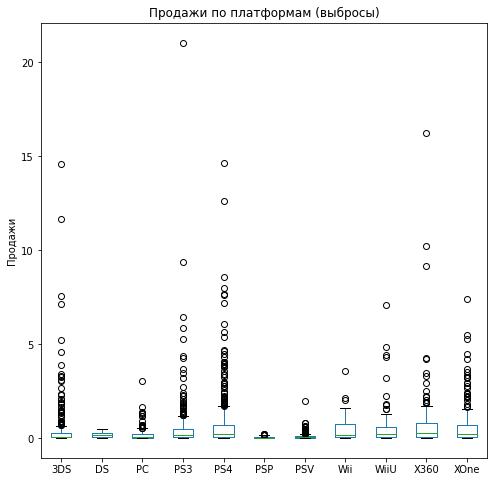

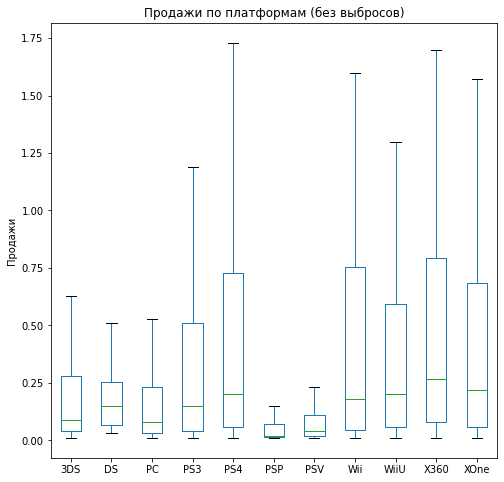

In [37]:
# построим диаграммы размаха по глобальным продажам игр в разбивке по платформам
actual_by_platform = actual.pivot_table(index='name', columns='platform', values='total_sales', aggfunc='sum')

#вид с выбросами
actual_by_platform.plot(kind='box',
                        title='Продажи по платформам (выбросы)',
                        xlabel='Платформа',
                        ylabel='Продажи',
                        figsize=(8, 8))

#вид без выбросов
actual_by_platform.plot(kind='box',
                        title='Продажи по платформам (без выбросов)',
                        xlabel='Платформа',
                        ylabel='Продажи',
                        showfliers=False,
                        figsize=(8, 8))

plt.show()

In [38]:
# расчет характеристик для описания диаграммы размаха
actual_by_platform.describe()

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
count,303.000000,8.000000,189.000000,345.000000,392.000000,67.000000,358.000000,23.000000,115.000000,186.000000,247.000000
mean,0.472772,0.192500,0.208624,0.525884,0.801378,0.052239,0.092151,0.593913,0.562000,0.735484,0.645020
std,1.381347,0.172026,0.352304,1.451939,1.609456,0.059768,0.153816,0.915432,1.038778,1.663275,1.036139
min,0.010000,0.030000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
25%,0.040000,0.067500,0.030000,0.040000,0.060000,0.015000,0.020000,0.045000,0.060000,0.080000,0.060000
50%,0.090000,0.150000,0.080000,0.150000,0.200000,0.020000,0.040000,0.180000,0.200000,0.265000,0.220000
75%,0.280000,0.252500,0.230000,0.510000,0.730000,0.070000,0.110000,0.755000,0.595000,0.795000,0.685000
max,14.600000,0.510000,3.050000,21.050000,14.630000,0.240000,1.960000,3.580000,7.090000,16.270000,7.390000


**Медианные значения** продаж для каждой игры у платформ с наибольшей суммой продаж по всем играм также получились самыми высокими. Если платформа популярна в целом, значит для неё продажи конкретной игры также будут самыми большими.

**Нормальными** можно считать значения в пределах 1.5 межквартильного размаха.

**Чрезвычайно низкими** можно назвать значения меньше Q2 - 1.5*IQR.

**Чрезвычайно высокими** можно назвать значения меньше Q2  + 1.5*IQR, на диаграмме можно заметить большое количество выбросов у лидирующих по продажам платформ.

### 3.6. Изучение влияния отзывов критиков и пользователей на продажи платформы

In [39]:
# функция для определения корреляции по платформе
def corr_func(platform):
    color = np.random.rand(3,).reshape(1,-1)
    
    # корреляция (отзывы критиков, продажи)
    pl = actual[actual['platform'] == platform].sort_values(by='critic_score')
    pl.plot(x='critic_score',
         y='total_sales',
         kind='scatter',
         title=f'Диаграмма рассеяния {platform} (оценка критика, продажи)',
         xlabel='Оценка критика',
         ylabel='Продажи',
         color=color,
         figsize=(5, 5))
    plt.show()
    
    print('Корреляция значений продаж со значениями отзывов критиков',
          round(pl['critic_score'].corr(pl['total_sales']), 2))
    
    # корреляция (отзывы пользователей, продажи)
    pl.plot(x='user_score', 
         y='total_sales', 
         kind='scatter', 
         title=f'Диаграмма рассеяния {platform} (оценка пользователей, продажи)',
         xlabel='Оценка пользователей',
         ylabel='Продажи',
         color=color,
         figsize=(5, 5))
    plt.show()
    
    print('Корреляция значений продаж со значениями отзывов пользователей',
          round(pl['user_score'].corr(pl['total_sales']), 2))

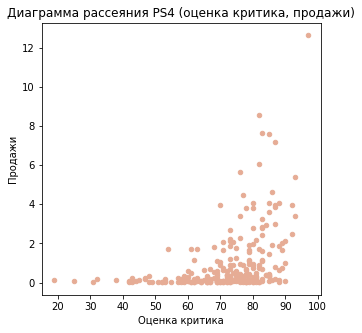

Корреляция значений продаж со значениями отзывов критиков 0.41


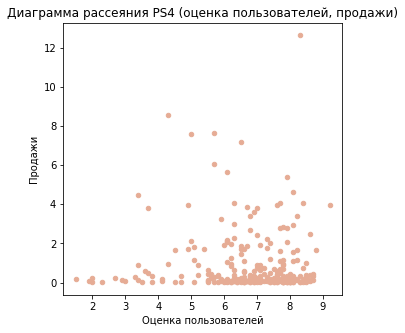

Корреляция значений продаж со значениями отзывов пользователей -0.03


In [40]:
# оценка корреляции, платформа PS4
corr_func('PS4')

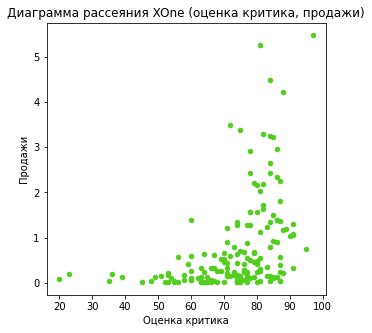

Корреляция значений продаж со значениями отзывов критиков 0.42


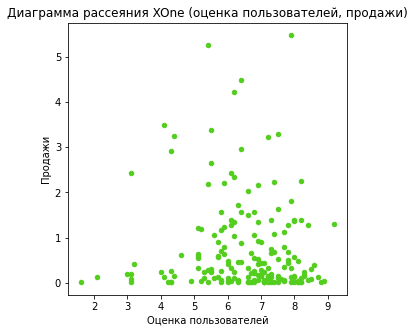

Корреляция значений продаж со значениями отзывов пользователей -0.07


In [41]:
# оценка корреляции, платформа XOne
corr_func('XOne')

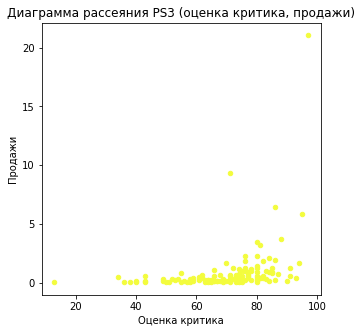

Корреляция значений продаж со значениями отзывов критиков 0.33


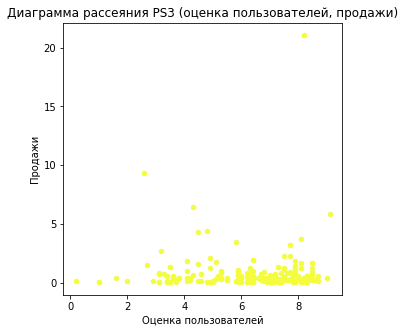

Корреляция значений продаж со значениями отзывов пользователей 0.0


In [42]:
# оценка корреляции, платформа PS3
corr_func('PS3')

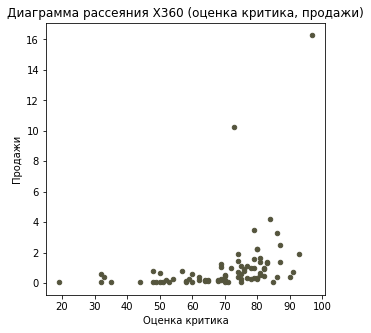

Корреляция значений продаж со значениями отзывов критиков 0.35


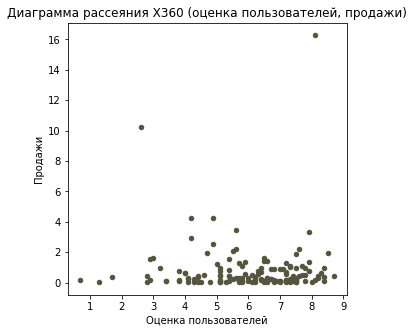

Корреляция значений продаж со значениями отзывов пользователей -0.01


In [43]:
# оценка корреляции, платформа X360
corr_func('X360')

*Для платформ PS4, XOne, PS3, X360 корреляция между отзывами критиков и продажами низкая, можно сказать, что отзывы критиков слабо влияют на продажи. Корреляции между отзывами пользователей и продажами нет.*

### 3.7. Изучение продаж по жанрам

In [44]:
# общее распределение игр по жанрам
genres = actual.pivot_table(
    index='genre', 
    values='total_sales', 
    aggfunc='sum').sort_values(
    by='total_sales', 
    ascending=False)
display(genres)

,total_sales
genre,
Action,321.87
Shooter,232.98
Sports,150.65
Role-Playing,145.89
Misc,62.82
Platform,42.63
Racing,39.89
Fighting,35.31
Adventure,23.64


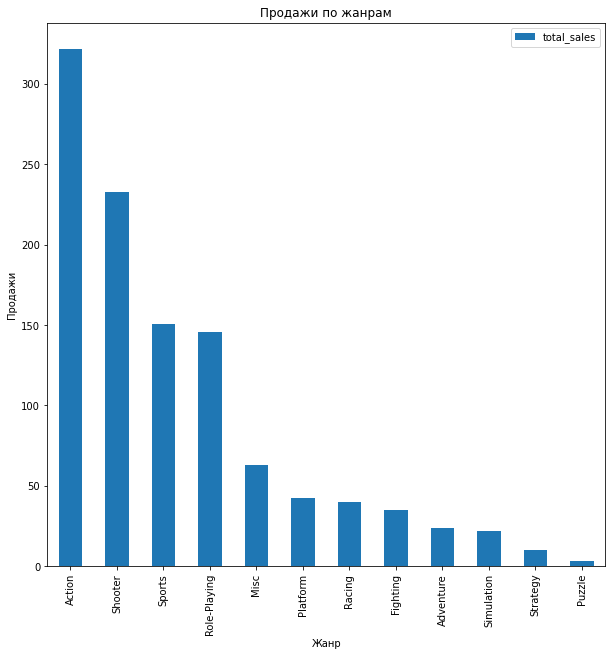

In [45]:
# построим столбчатую продаж по жанрам
genres.plot(kind='bar', 
            title='Продажи по жанрам',
            xlabel='Жанр',
            ylabel='Продажи',
            figsize=(10, 10))
plt.show()

*К самым прибыльным жанрам относятся 'Action', 'Shooter', 'Sports', 'Role-Playing'. Выделяется жанр с самыми большими продажами 'Action' и жанр с самыми низкими продажами 'Puzzle'.*

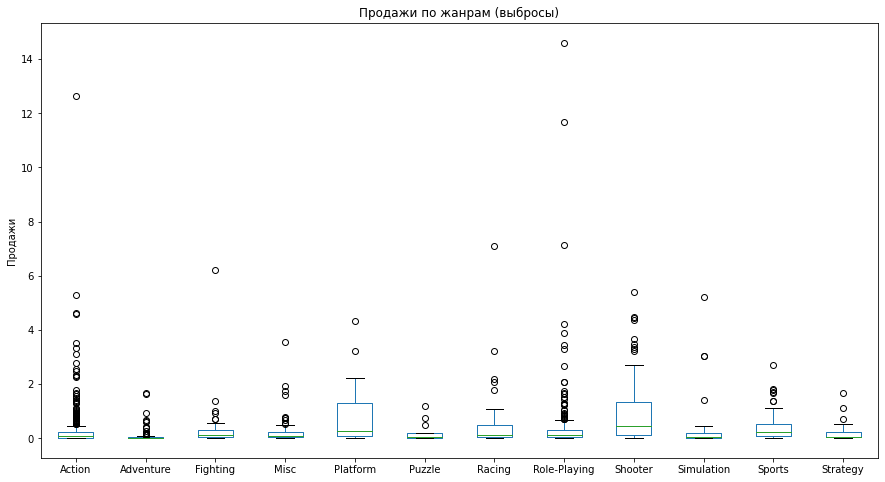

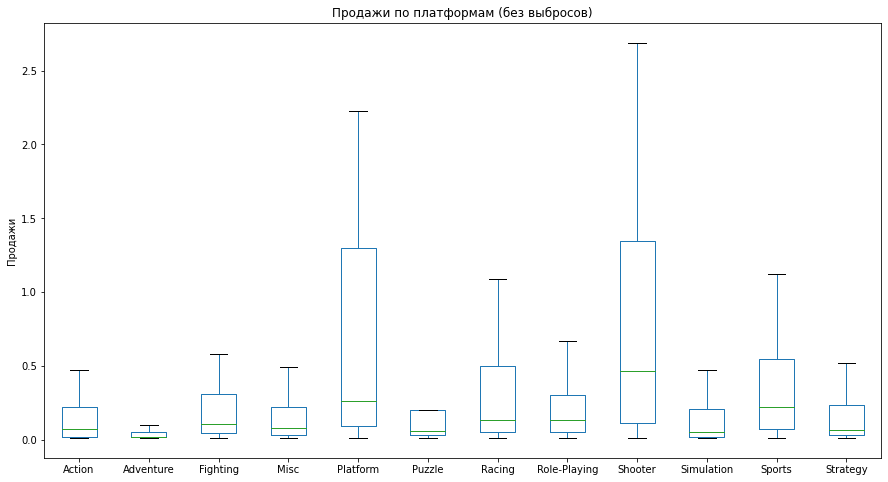

In [46]:
# построим диаграмму размаха по жанрам и продажам
actual_by_genre = actual.pivot_table(index='name', columns='genre', values='total_sales', aggfunc='median')

#вид с выбросами
actual_by_genre.plot(kind='box',
                        title='Продажи по жанрам (выбросы)',
                        xlabel='Жанр',
                        ylabel='Продажи',
                        figsize=(15, 8))

#вид без выбросов
actual_by_genre.plot(kind='box',
                        title='Продажи по платформам (без выбросов)',
                        xlabel='Жанр',
                        ylabel='Продажи',
                        showfliers=False,
                        figsize=(15, 8))

plt.show()

*Проанализировав диаграмму размаха, можно сделать вывод, что в жанре Shooter медианное значение продаж самое высокое, вероятность того, что отдельно взятая игра в этом жанре будет иметь большие продажи выше чем у других жанров, на втором месте, оказался жанр Platform.*

### 3.8. Составление портретов пользователей из разных регионов

In [47]:
# функция получения информации для составления портрета пользователей из разных регионов
def portret(feature):
    # условие для вывода зарактеристики
    feature_name = 'платформы'
    if feature == 'platform':
        feature_name = 'платформ'
    elif feature == 'genre':
        feature_name = 'жанров'
    else:
        feature_name = 'рейтингов'
    
    # данные для региона NA
    na_top_pvt = actual.pivot_table(index=feature, 
                                    values='na_sales', 
                                    aggfunc='sum').sort_values(
                                    by='na_sales',
                                    ascending=False)
    
    na_other_sum = na_top_pvt.iloc[5:].sum()
    na_top5 = na_top_pvt.iloc[0:5]
    na_other = pd.DataFrame([na_other_sum], index=['Other'], columns=['na_sales'])
    na_top_pvt = pd.concat([na_top5, na_other])
    
    # данные для региона EU
    eu_top_pvt = actual.pivot_table(index=feature, 
                                    values='eu_sales', 
                                    aggfunc='sum').sort_values(
                                    by='eu_sales',
                                    ascending=False)
    
    eu_other_sum = eu_top_pvt.iloc[5:].sum()
    eu_top5 = eu_top_pvt.iloc[0:5]
    eu_other = pd.DataFrame([eu_other_sum], index=['Other'], columns=['eu_sales'])
    eu_top_pvt = pd.concat([eu_top5, eu_other])
    
    # данные для региона JP
    jp_top_pvt = actual.pivot_table(index=feature, 
                                    values='jp_sales', 
                                    aggfunc='sum').sort_values(
                                    by='jp_sales',
                                    ascending=False)
    
    jp_other_sum = jp_top_pvt.iloc[5:].sum()
    jp_top5 = jp_top_pvt.iloc[0:5]
    jp_other = pd.DataFrame([jp_other_sum], index=['Other'], columns=['jp_sales'])
    jp_top_pvt = pd.concat([jp_top5, jp_other])
    
    # вывод графика
    fig, ax = plt.subplots(ncols=3, figsize=(15, 5))
    fig.suptitle('Обзор рынка платформ (портрет покупателя)')
    na_top_pvt.plot(title=f'Популярность {feature_name} в Северной Америке', 
                    ax=ax[0], 
                    kind='pie', 
                    y='na_sales', 
                    autopct='%1.0f%%')
    eu_top_pvt.plot(title=f'Популярность {feature_name} в Европе', 
                    ax=ax[1], 
                    kind='pie', 
                    y='eu_sales', 
                    autopct='%1.0f%%')
    jp_top_pvt.plot(title=f'Популярность {feature_name} в Японии', 
                    ax=ax[2], 
                    kind='pie', 
                    y='jp_sales', 
                    autopct='%1.0f%%')
    plt.show()

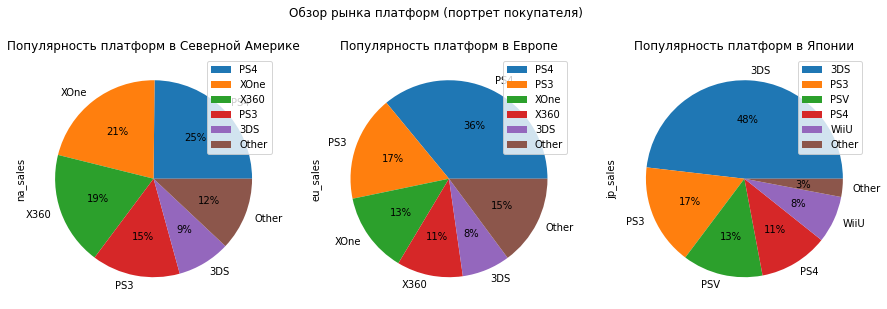

In [48]:
# портрет пользователей по платформам
portret('platform')

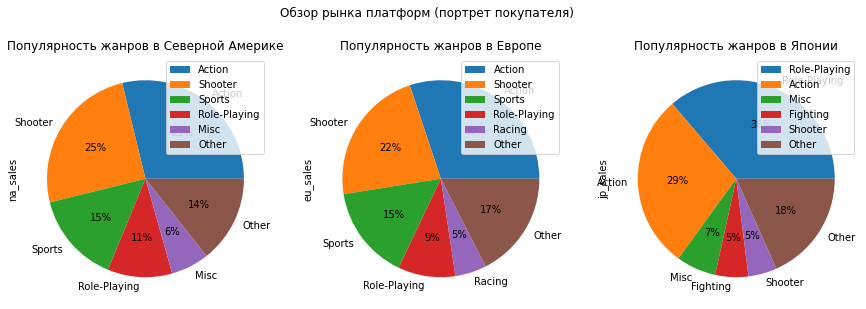

In [49]:
# портрет пользователей по жанрам
portret('genre')

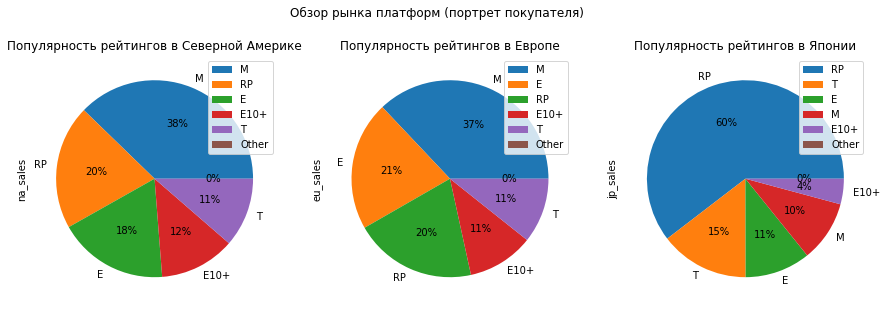

In [50]:
# портрет пользователей по рейтингу ESRB
portret('rating')

**Платформа:**

*В регионах NA и EU самыми популярными платформами являются PS4, на втором месте в NA - XOne, в EU - PS3. В JP самые популярные платформы - 3DS и PS3. 3DS составляет почти 50% продаж. Такое распределение может быть связано с тем, что Xone - локальный производитель для NA, PS и 3DS - для JP, а для EU все производители являются иностранными, и в разных поколениях, то один то другой лидируют в продажах.*

*Для NA и EU лидерами продаж являются жанры Action и Shooter, для JP - Role-Playing и Action. Такое распределение может быть связано с тем, что Action всемирно известный жанр, а в JP находится большое количество разработчиков жанра Role-Playing.*

*Наибольшие продажи в NA имеют игры с рейтингом M и RP, в регионе EU наибольшие продажи по рейтингам M и E, в Японии RP и T.*

## 4. Проверка гипотез

### 4.1. Гипотеза о равенстве рейтингов платформ

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

*Необходимо сравнить значения столбца 'user_score' для платформ XOne и PC для каждой игры в наборе данных. Необходимо провести статистический тест для двух независимых выборок, игры на платформах выходят независимо, никак не влияя друг на друга. Сформулируем гипотезы:*

*H0: Средние пользовательские рейтинги платформ Xbox One и PC равны.*

*H1: Средние пользовательский рейтинг платформы Xbox One и PC не равны.*

*Нулевую гипотезу приняли в виде утверждения, которое необходимо проверить, акцентируя внимание на равенстве, альтернативную гипотезу рассморим двухстороннюю, как противоположную от исходной*

Зададим уровень статистической значимости 0.05

In [51]:
# зададим выборку для XOne
xone_score = actual[actual['platform'] == 'XOne']['user_score'].dropna()
len(xone_score)

182

In [52]:
# зададим выборку для PC
pc_score = actual[actual['platform'] == 'PC']['user_score'].dropna()
len(pc_score)

155

Проведем F тест на равенство дисперсий с уровнем статистической значимости 0.05.

H 0 : Дисперсия равны.

H 1 : Дисперсии не равны.

In [53]:
# функция для f-test
def f_test(x, y):
    x = np.array(x)
    y = np.array(y)
    f = np.var(x, ddof=1)/np.var(y, ddof=1)
    dfn = x.size-1
    dfd = y.size-1
    p = 1-st.f.cdf(f, dfn, dfd)
    return f, p

In [54]:
# выполним f-test
results = f_test(xone_score, pc_score)

if results[1] < 0.05:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Не получилось отвергнуть нулевую гипотезу


*Можем использовать статистический тест с параметром equal_var=True.*

In [55]:
# задаем уровень статистической значимости
alpha = 0.05

# проводим тест
results = st.ttest_ind(xone_score, pc_score, equal_var=True)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


*Не получилось отвергнуть нулевую гипотезу. С большой долей уверенности можем предположить справедливость гипотезы о том, что средние пользовательские рейтинги двух платформ равны.*

### 4.2. Гипотеза о неравенстве рейтингов жанров

2. Средние пользовательские рейтинги жанров Action и Sports разные.

*Необходимо сравнить значения столбца 'user_score' для жанров Action и Sports для каждой игры в наборе данных. Необходимо провести статистический тест для двух независимых выборок, игры разных жанров выходят независимо, никак не влияя друг на друга. Сформулируем гипотезы:*

*H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые.*

*H1: Средние пользовательские рейтинги жанров Action и Sports разные.*

*Нулевую гипотезу приняли о равенстве, которое будет проверено статистическим тестом, альтернативную гипотезу рассморим двухстороннюю, чтобы проверить заданную условием гипотезу.*

Зададим уровень статистической значимости 0.05

In [56]:
# зададим выборку для Action
action_score = actual[actual['genre'] == 'Action']['user_score'].dropna()
len(action_score)

389

In [57]:
# зададим выборку для Sports
sports_score = actual[actual['genre'] == 'Sports']['user_score'].dropna()
len(sports_score)

160

Проведем F тест на равенство дисперсий с уровнем статистической значимости 0.05.

H 0 : Дисперсия равны.

H 1 : Дисперсии не равны.

In [58]:
# выполним f-test
results = f_test(action_score, sports_score)

if results[1] < 0.05:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Не получилось отвергнуть нулевую гипотезу


*Можем использовать статистический тест с параметром equal_var=True.*

In [59]:
# задаем уровень статистической значимости
alpha = 0.05

# проводим тест
results = st.ttest_ind(action_score, sports_score, equal_var=True)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


*Можем отвергнуть гипотезу о равенстве пользовательских рейтингов для двух жанров. Имеем основания предпологать, что альтернативная гипотеза, которая одновременно является гипотезой из условия справедлива, средние пользовательские рейтинги жанров Action и Sports разные.*

In [60]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


## 5. Выводы

        В ходе исследования были проанализированы данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Необходимо было выявить определяющие успешность игры закономерности для развития успешных продуктов, планирования рекламных кампаний.
        
        На этапе предобработки данных были заданы типы данных столбцов, выполнена проверка на дублирование строк и заполнены пропуски. Корректно обработаны данные critic_score, значение tbd заменено на nan. Пропущенные значения рейтинга ESRB в столбце'rating' заменены на 'RP'. Добавлен столбец с расчетным значением суммы продаж по регионам.
        
         Наибольшие суммарные продажи имеют платформы: 'PS2', 'X360', 'Wii', 'PS3', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'GB'. В среднем примерно за 8 лет появляются новые и исчезают старые платформы. В качестве актуального периода для предсказания результатов продаж 2017 года можно рассматривали временной отрезок с 2013 по 2016 год.
         
         Лидерами по продажам за актуальный период являются платформы PS4, PS3, XOne, 3DS, X360. Суммарные продажи остальных платформ более чем в 2 раза меньше, а также имеют отрицательную динамику. PS3, X360, 3DS прошли свой пик по продажам, у этих платформ видна тенденция к сокращению продаж. PS4 и XOne актуальные платформы, их вклад в сумму продаж за 2017 год будет наибольшим из существующих платформ.
         
         Корреляция между отзывами критиков и продажами низкая, можно сказать, что отзывы критиков слабо влияют на продажи. Корреляция между отзывами пользователей и продажами отсутствует. Рассмотрены платформы PS4, XOne, PS3, X360.
         
         В регионах NA и EU самыми популярными платформами являются PS4, на втором месте в NA - XOne, в EU - PS3. В JP самые популярные платформы - 3DS и PS3. 3DS составляет почти 50% продаж. Такое распределение может быть связано с тем, что Xone - локальный производитель для NA, PS и 3DS - для JP, а для EU все производители являются иностранными, и в разных поколениях, то один то другой лидируют в продажах. Для NA и EU лидерами продаж являются жанры Action и Shooter, для JP - Role-Playing и Action. Такое распределение может быть связано с тем, что Action всемирно известный жанр, а в JP находится большое количество разработчиков жанра Role-Playing. Наибольшие продажи в NA имеют игры с рейтингом M и RP, в регионе EU наибольшие продажи по рейтингам M и E, в Японии RP и T.
         
         Проверена гипотеза о равенстве пользовательских рейтингов платформ XOne и PC. Не получилось отвергнуть нулевую гипотезу. С большой долей уверенности можем предположить справедливость гипотезы о том, что средние пользовательские рейтинги двух платформ равны.
         
         Проверена гипотеза о неравенстве пользовательских рейтингов жанров Action и Sports. Можем отвергнуть гипотезу о равенстве пользовательских рейтингов для двух жанров. Имеем основания предпологать, что альтернативная гипотеза, которая одновременно является гипотезой из условия справедлива, средние пользовательские рейтинги жанров Action и Sports разные.

## 6. Рекомендации заказчику

    В качестве рекомендации по планированию рекламных кампаний на 2017 год к рассмотрению по результатам исследования предлагаются платформы: PS4 и XOne. PS4 уже находится на пике по продажам, а продажи XOne только растут.

    Отзывы критиков и пользователей слабо влияют на продажи, не стоит в первую очередь планировать рекламный бюджет в этих областях.
    
    Для регионов NA, EU будут интересны жанры Action и Shooter, а для региона JP Role-Playing и Action.